In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
path = "BostonHousing.csv"
data = pd.read_csv(path)
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.isnull().sum()  #no empty values in the dataset

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [4]:
data_simple_feature = data.copy() #new = old/max
data_simple_feature = data_simple_feature.drop("medv", axis = 1)
data_min_max = data.copy() #New = (old-min)/(max-min)
data_min_max = data_min_max.drop("medv", axis = 1)
data_z_score = data.copy() #new = (old-mean)/std
data_z_score = data_z_score.drop("medv", axis = 1)


In [18]:
for column in data_simple_feature.columns:
    data_simple_feature[column] = data_simple_feature[column]/(data_simple_feature[column].max())
data_simple_feature


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.000071,0.18,0.083273,0.0,0.617681,0.748861,0.652,0.337278,0.041667,0.416315,0.695455,1.000000,0.131156
1,0.000307,0.00,0.254867,0.0,0.538462,0.731321,0.789,0.409607,0.083333,0.340366,0.809091,1.000000,0.240716
2,0.000307,0.00,0.254867,0.0,0.538462,0.818337,0.611,0.409607,0.083333,0.340366,0.809091,0.989746,0.106136
3,0.000364,0.00,0.078587,0.0,0.525832,0.797039,0.458,0.499913,0.125000,0.312236,0.850000,0.994281,0.077430
4,0.000776,0.00,0.078587,0.0,0.525832,0.814009,0.542,0.499913,0.125000,0.312236,0.850000,1.000000,0.140374
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000704,0.00,0.430065,0.0,0.657865,0.750911,0.691,0.204395,0.041667,0.383966,0.954545,0.987629,0.254675
502,0.000509,0.00,0.430065,0.0,0.657865,0.697039,0.767,0.188636,0.041667,0.383966,0.954545,1.000000,0.239136
503,0.000683,0.00,0.430065,0.0,0.657865,0.794533,0.910,0.178741,0.041667,0.383966,0.954545,1.000000,0.148538
504,0.001232,0.00,0.430065,0.0,0.657865,0.773804,0.893,0.196998,0.041667,0.383966,0.954545,0.991308,0.170661


In [6]:
for column in data_min_max.columns:
    data_min_max[column] = (data_min_max[column]-data_min_max[column].min())/(data_min_max[column].max() - data_min_max[column].min())
data_min_max

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [7]:
for column in data_z_score.columns:
    data_z_score[column] = (data_z_score[column]-data_z_score[column].mean())/data_z_score[column].std()
data_z_score

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


In [8]:
#data.corr()
data.corr()["medv"]

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

<AxesSubplot:xlabel='lstat', ylabel='medv'>

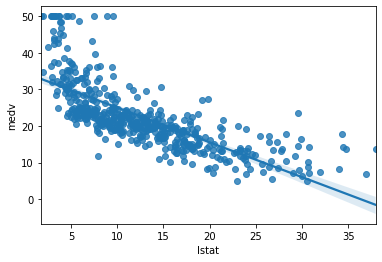

In [9]:
sns.regplot(x= "lstat", y="medv",data=data)

<AxesSubplot:xlabel='rm', ylabel='medv'>

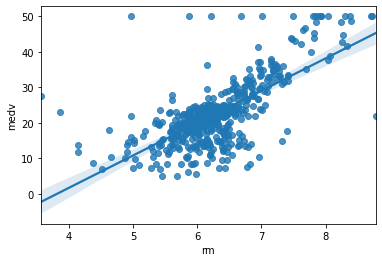

In [10]:
sns.regplot(x="rm", y="medv", data = data)

In [11]:
x_data = data[["lstat","rm"]]
x_data_simple_feature = data_simple_feature[["lstat","rm"]]

x_data_minmax = data_min_max[["lstat","rm"]]
x_data_zscore = data_z_score[["lstat","rm"]]

y_data = data["medv"]

#y_data_simple_feature = data_simple_feature["medv"]
#y_data_minmax = data_min_max["medv"]
#y_data_zscore = data_z_score["medv"]


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.1,random_state=4)
lm = LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_test,y_test)
#print("Number of test samples:",x_test.shape[0])
#print("Number of training samples:", x_train.shape[0])

0.7147960185164086

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_data_simple_feature,y_data,test_size = 0.1,random_state=9)
lm1 = LinearRegression()
lm1.fit(x_train,y_train)
lm1.score(x_test,y_test)

0.7282413424186436

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x_data_minmax,y_data,test_size = 0.1,random_state=9)
lm2 = LinearRegression()
lm2.fit(x_train,y_train)
lm2.score(x_test,y_test)


0.7147960185164088

In [15]:

x_train,x_test,y_train,y_test = train_test_split(x_data_zscore,y_data,test_size = 0.1,random_state=9)
lm3 = LinearRegression()
lm3.fit(x_train,y_train)
lm3.score(x_test,y_test)


0.7147960185164087